## Хід виконання роботи:
1. Побудувати моделi класифiкацiї або регресiї згiдно з варiантом.
2. Виконати прогнози на основi побудованих моделей.
3. Для кожної з моделей оцiнити, чи має мiсце перенавчання.
4. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi, опорнi вектори або iншi (згiдно з варiантом).
5. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.
6. В задачах класифiкацiї розрахувати значення наступних критерiїв якостi, для кожної моделi окремо на навчальнiй та перевiрочнiй множинах:
    * матрицю неточностей (confusion matrix),
    * точнiсть (precision),
    * повноту (recall),
    * мiру F1 (F1 score),
    * побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.
7. В задачах регресiї розрахувати критерiї якостi для кожної моделi окремо на навчальнiй та перевiрочнiй множинах:
    * коефiцiєнт детермiнацiї R2,
    * помилки RMSE, MAE та MAPE.
8. Виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.
9. Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi вибрати найкращу модель.
10. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.
11. Кожен варiант мiстить два набори даних. Дослiдити обидва набори за наведеними вище етапами.

## Завдання згідно варіанту 17:

### Побудувати моделi логiстичної регресiї:
* Просту логiстичну регресiю, використовуючи sklearn.linear_model.LogisticRegression.
* Полiномiальну логiстичну регресiю (multinomial logistic regression), встановивши гiперпараметри multi_class = "multinomial" та solver = "lbfgs".
* Для наведених моделей побудувати варiанти з i без регуляризацiї.
* Для кожної моделi розрахувати апостерiорнi iмовiрностi для тестового прикладу, використовуючи метод predict_proba.

Початковi данi:
(а) 
```python 
from sklearn.datasets import make_blobs
n_samples_1 = 1000
n_samples_2 = 100
centers = [[ 0.0, 0.0 ], [ 2.0, 2.0 ]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)
```
(б) sklearn.datasets.fetch_covtype - це надвеликий набiр. Якщо не вийде працювати з ним цiлком, достатньо сформувати з нього пiднабiр, обираючи елементи випадковим чином. Моделi будувати на сформованому пiднаборi.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("max_colwidth", 150)

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

### 1. Data overview

### *(a)*

In [2]:
from sklearn.datasets import make_blobs
n_samples_1 = 1000
n_samples_2 = 100
centers = [[ 0.0, 0.0 ], [ 2.0, 2.0 ]]
clusters_std = [1.5, 0.5]
X_a, y_a = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [3]:
classes_a, num_of_samples_per_class_a = np.unique(y_a, return_counts=True)
print(f'Number of samples: {X_a.shape[0]}.')
print(f'Number of features: {X_a.shape[1]}.')
print(f'Number of classes: {len(classes_a)}.')
print('Number of samples for each class:')
for i in range(len(classes_a)):
    print(f'{classes_a[i]} - {num_of_samples_per_class_a[i]}')

Number of samples: 1100.
Number of features: 2.
Number of classes: 2.
Number of samples for each class:
0 - 1000
1 - 100


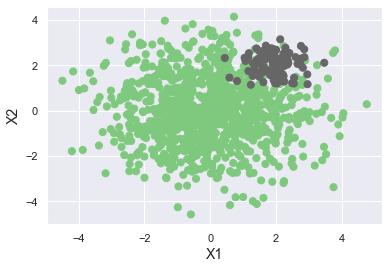

In [4]:
_ = plt.scatter(X_a[:, 0], X_a[:, 1], c=y_a, s=50, cmap='Accent')
_ = plt.xlabel("X1", fontsize=14)
_ = plt.ylabel("X2", fontsize=14)

### *(б)*

In [5]:
from sklearn.datasets import fetch_covtype

forest, cover_type = fetch_covtype(as_frame=True, return_X_y=True)
X_b, y_b = forest.to_numpy(), cover_type.to_numpy()

In [6]:
forest.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0           238.0          135.0   
3          238.0           238.0          122.0   
4          220.0           234.0          150.0   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_30  Soil_Type_31  \
0                              6279.0  ...           0.0           0.0   
1                              6225.0  ...           0.0           0.0   
2                              6121.0  ...           0.0           0.0   
3                              6211.0  ...           0.0           0.0   
4                              6172.0  ...           0.0           0.0   

   Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_37  Soil_Type_38  Soil_Type_39  
0           0.0           0.0           0.0  
1           0.0           0.0           0.0  
2           0.0           0.0           0.0  
3           0.0           0.0           0.0  
4           0.0           0.0           0.0  

[5 rows x 54 columns]

In [7]:
forest.columns.to_numpy()

array(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_

In [8]:
wilderness_area = ['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3']
soil_type = ['Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']

In [9]:
forest[wilderness_area].sample(n=5, random_state=1)

Wilderness_Area_0  Wilderness_Area_1  Wilderness_Area_2  \
376969                0.0                0.0                1.0   
59897                 1.0                0.0                0.0   
247100                0.0                0.0                0.0   
111532                1.0                0.0                0.0   
522294                0.0                0.0                1.0   

        Wilderness_Area_3  
376969                0.0  
59897                 0.0  
247100                1.0  
111532                0.0  
522294                0.0

In [10]:
forest[soil_type].sample(n=5, random_state=1)

Soil_Type_0  Soil_Type_1  Soil_Type_2  Soil_Type_3  Soil_Type_4  \
376969          0.0          0.0          0.0          0.0          0.0   
59897           0.0          0.0          0.0          0.0          0.0   
247100          0.0          0.0          0.0          0.0          0.0   
111532          0.0          0.0          0.0          0.0          0.0   
522294          0.0          0.0          0.0          0.0          0.0   

        Soil_Type_5  Soil_Type_6  Soil_Type_7  Soil_Type_8  Soil_Type_9  ...  \
376969          0.0          0.0          0.0          0.0          1.0  ...   
59897           0.0          0.0          0.0          0.0          0.0  ...   
247100          0.0          0.0          0.0          0.0          1.0  ...   
111532          0.0          0.0          0.0          0.0          0.0  ...   
522294          0.0          0.0          0.0          0.0          0.0  ...   

        Soil_Type_30  Soil_Type_31  Soil_Type_32  Soil_Type_33  Soil_Type_34  \
376969           0.0           0.0           0.0           0.0           0.0   
59897            0.0           0.0           0.0           0.0           0.0   
247100           0.0           0.0           0.0           0.0           0.0   
111532           0.0           0.0           0.0           0.0           0.0   
522294           0.0           0.0           1.0           0.0           0.0   

        Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  Soil_Type_39  
376969           0.0           0.0           0.0           0.0           0.0  
59897            0.0           0.0           0.0           0.0           0.0  
247100           0.0           0.0           0.0           0.0           0.0  
111532           0.0           0.0           0.0           0.0           0.0  
522294           0.0           0.0           0.0           0.0           0.0  

[5 rows x 40 columns]

Ознаки 'Soil_type' і 'Wilderness_Area' є категоріальними та представлені у наборі даних, як "one-hot encoded" вектори. Загалом, є чотири типи wilderness areas і 40 типів soil. Інші ознаки - числові. 

In [11]:
def number_of_each_type(feature_names, df, num_of_classes, target):
    m = len(feature_names)
    counter = np.zeros((num_of_classes, m), dtype=int)
    for f_indx in range(m):
        for i in range(num_of_classes):
            counter[i, f_indx] = ((df[feature_names[f_indx]]).to_numpy())[target == i + 1].sum()
    counter_frame = pd.DataFrame(counter, index=[i for i in range(1, num_of_classes + 1)], columns=feature_names)
    return counter_frame

wilderness_area_df = number_of_each_type(wilderness_area, forest, 7, y_b)
soil_type_df = number_of_each_type(soil_type, forest, 7, y_b)

In [12]:
wilderness_area_df

Wilderness_Area_0  Wilderness_Area_1  Wilderness_Area_2  Wilderness_Area_3
1             105717              18595              87528                  0
2             146197               8985             125093               3026
3                  0                  0              14300              21454
4                  0                  0                  0               2747
5               3781                  0               5712                  0
6                  0                  0               7626               9741
7               5101               2304              13105                  0

In [13]:
soil_type_df

Soil_Type_0  Soil_Type_1  Soil_Type_2  Soil_Type_3  Soil_Type_4  \
1            0            0            0          182            0   
2            0          852         1191         3251            0   
3         2101         4991         2411         7501          967   
4          178          115         1018          168           48   
5            0          264            0          585            0   
6          752         1303          203          631          582   
7            0            0            0           78            0   

   Soil_Type_5  Soil_Type_6  Soil_Type_7  Soil_Type_8  Soil_Type_9  ...  \
1            0            0           43          161          956  ...   
2          912          105          136          986        10803  ...   
3         3993            0            0            0        11532  ...   
4          320            0            0            0          224  ...   
5            0            0            0            0          260  ...   
6         1350            0            0            0         8859  ...   
7            0            0            0            0            0  ...   

   Soil_Type_30  Soil_Type_31  Soil_Type_32  Soil_Type_33  Soil_Type_34  \
1         11863         21358         18148            94           931   
2         13209         29556         25308          1431            12   
3             0           106             5             0             0   
4             0             0             0             0             0   
5           309           460           518            20             0   
6            63           200           539            15             0   
7           222           839           636            51           948   

   Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  Soil_Type_39  
1            14             0          8729          7882          4826  
2            42             0           740           358           332  
3             0             0             0             0             0  
4             0             0             0             0             0  
5             0             0             0             0             0  
6             0             0             0             0             0  
7            63           298          6104          5566          3592  

[7 rows x 40 columns]

In [14]:
classes, num_of_samples_per_class = np.unique(y_b, return_counts=True)
print(f'Number of samples: {forest.shape[0]}, number of features: {forest.shape[1] - 39 - 3}.')
print(f'Number of classes: {len(classes)}.')
print('Number of samples for each class:')
for i in range(len(classes)):
    print(f'{classes[i]} - {num_of_samples_per_class[i]}')
    
print(f'\nNumber of missing values: {forest.isnull().sum().sum()}')

Number of samples: 581012, number of features: 12.
Number of classes: 7.
Number of samples for each class:
1 - 211840
2 - 283301
3 - 35754
4 - 2747
5 - 9493
6 - 17367
7 - 20510

Number of missing values: 0


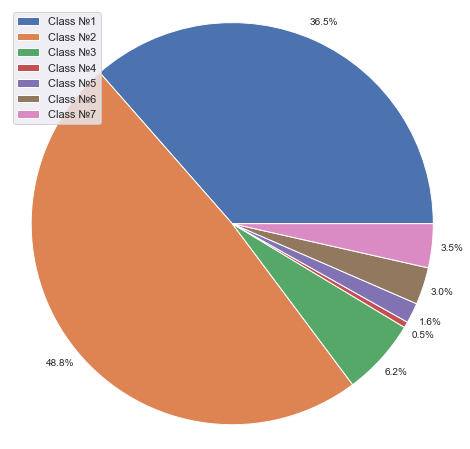

In [15]:
labels = ["Class №" + str(i + 1) for i in range(len(classes))]
fig, ax = plt.subplots(figsize=(8, 8))
_ = ax.pie(num_of_samples_per_class, labels=labels, autopct='%1.1f%%', pctdistance=1.1, labeldistance=None)
ax.legend(loc="upper left")
_ = ax.axis('equal')

Тут ми бачимо, що набір даних дуже незбалансований.

In [16]:
num_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

In [17]:
df = pd.concat([forest[num_features], cover_type], axis=1)


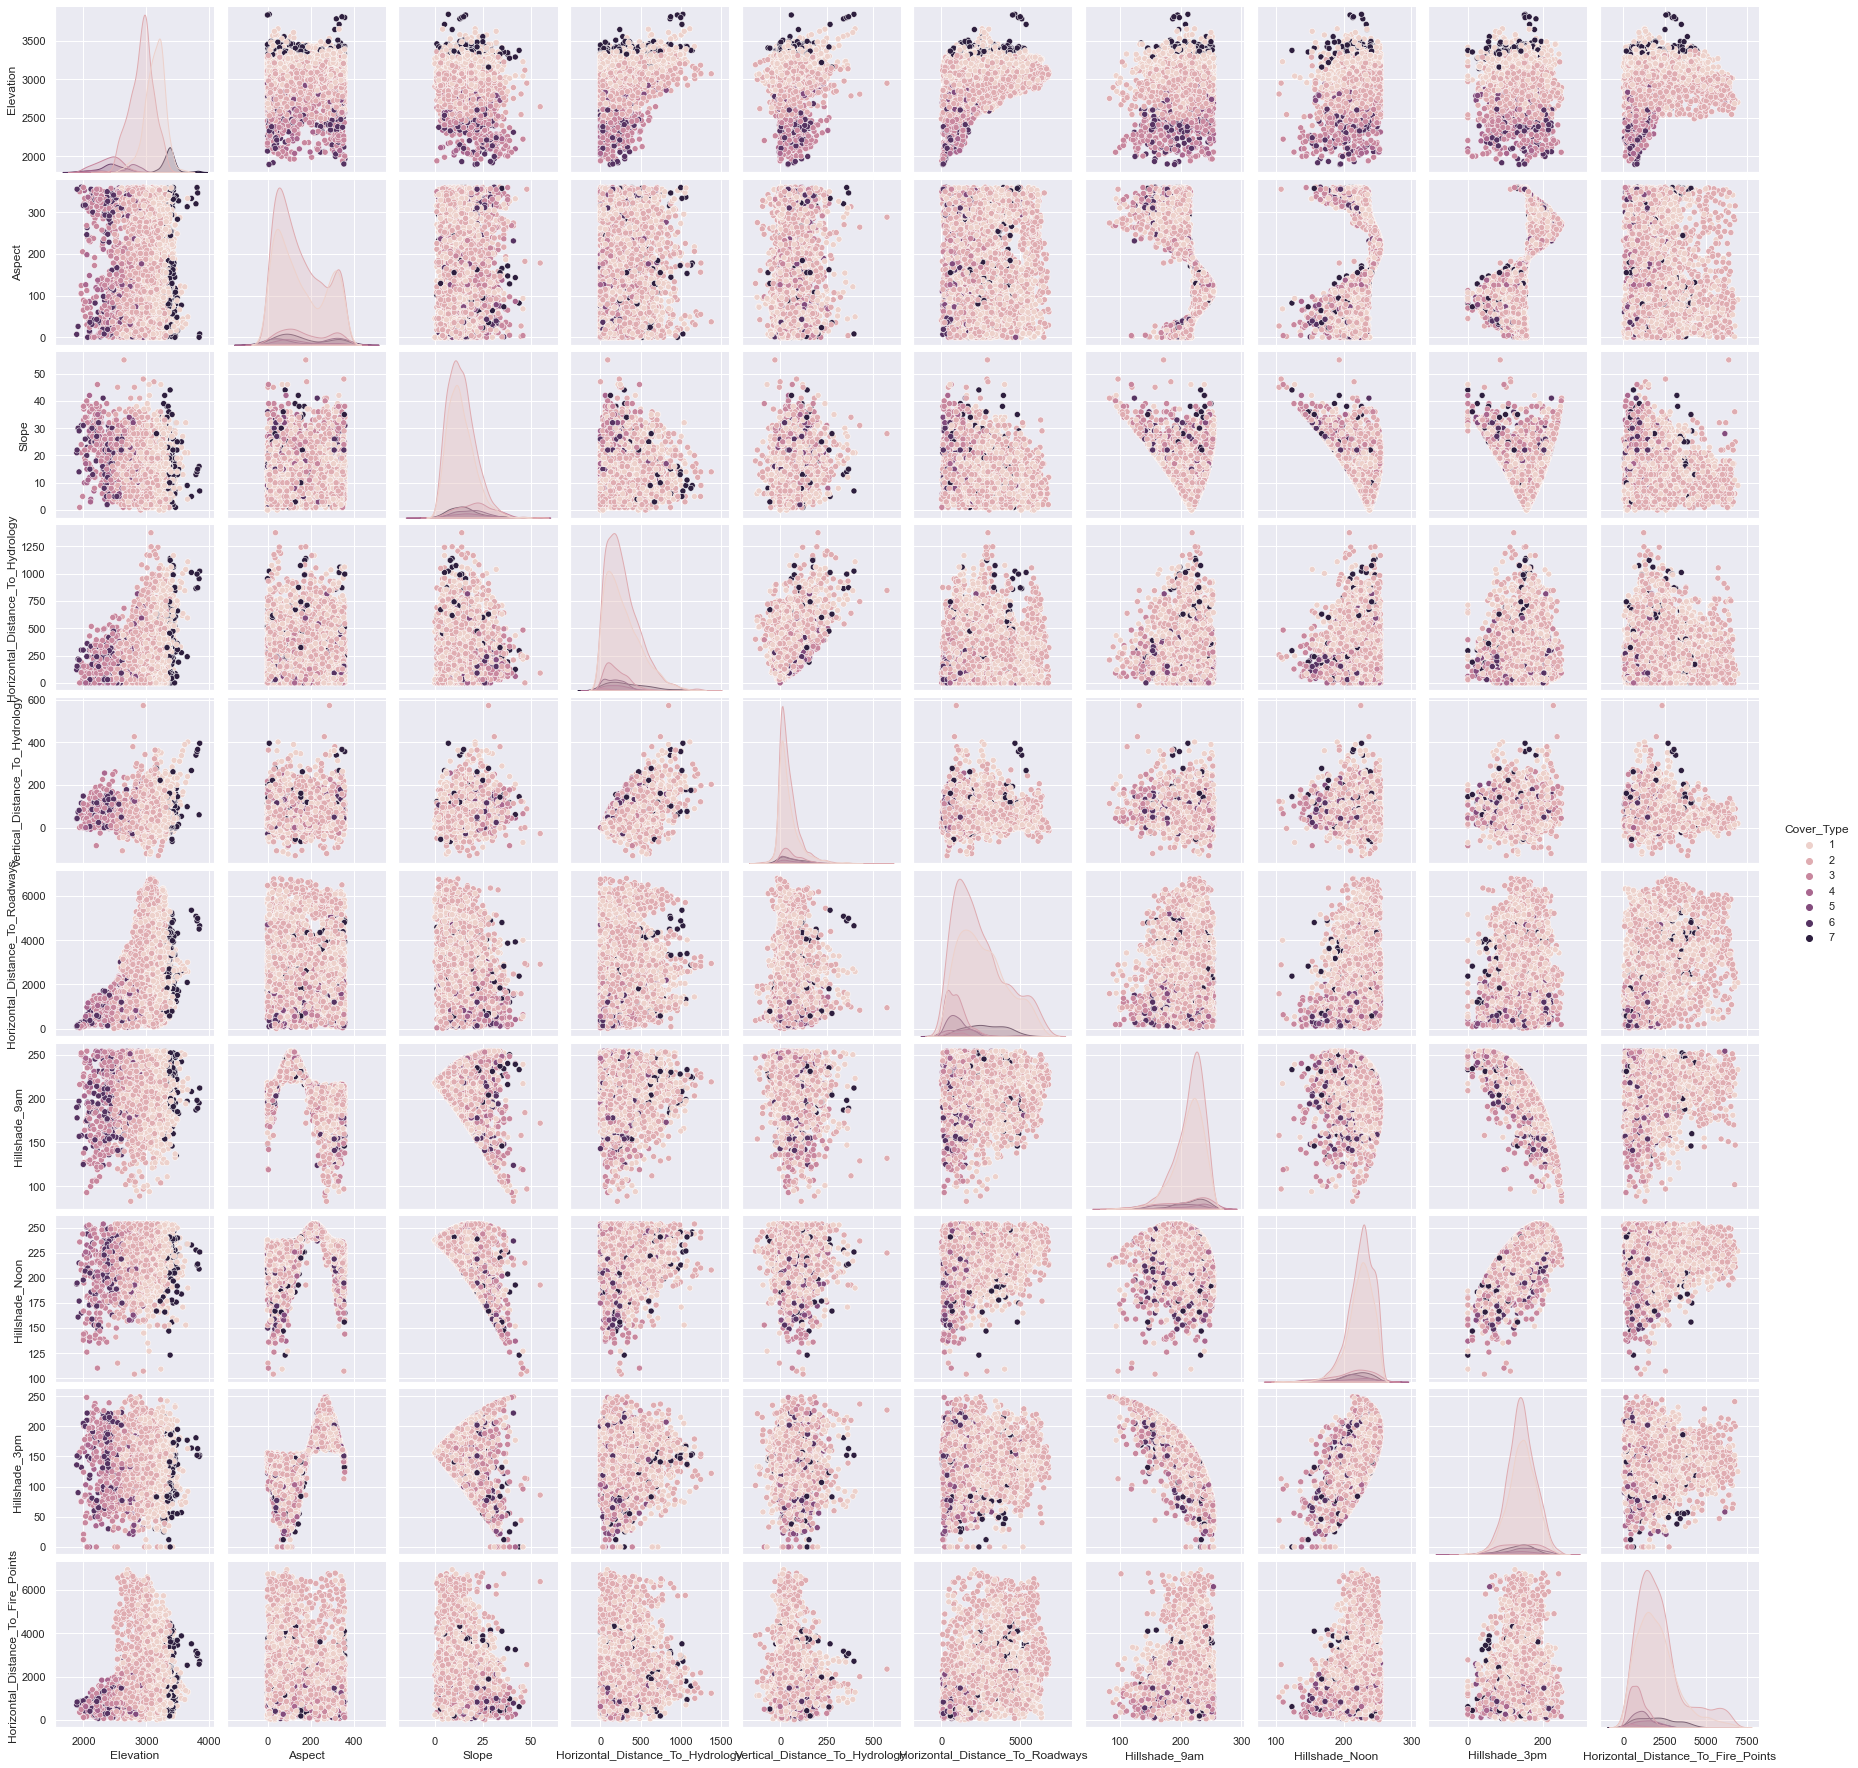

In [18]:
sns.pairplot(df.sample(n=5000, random_state=0), hue='Cover_Type')

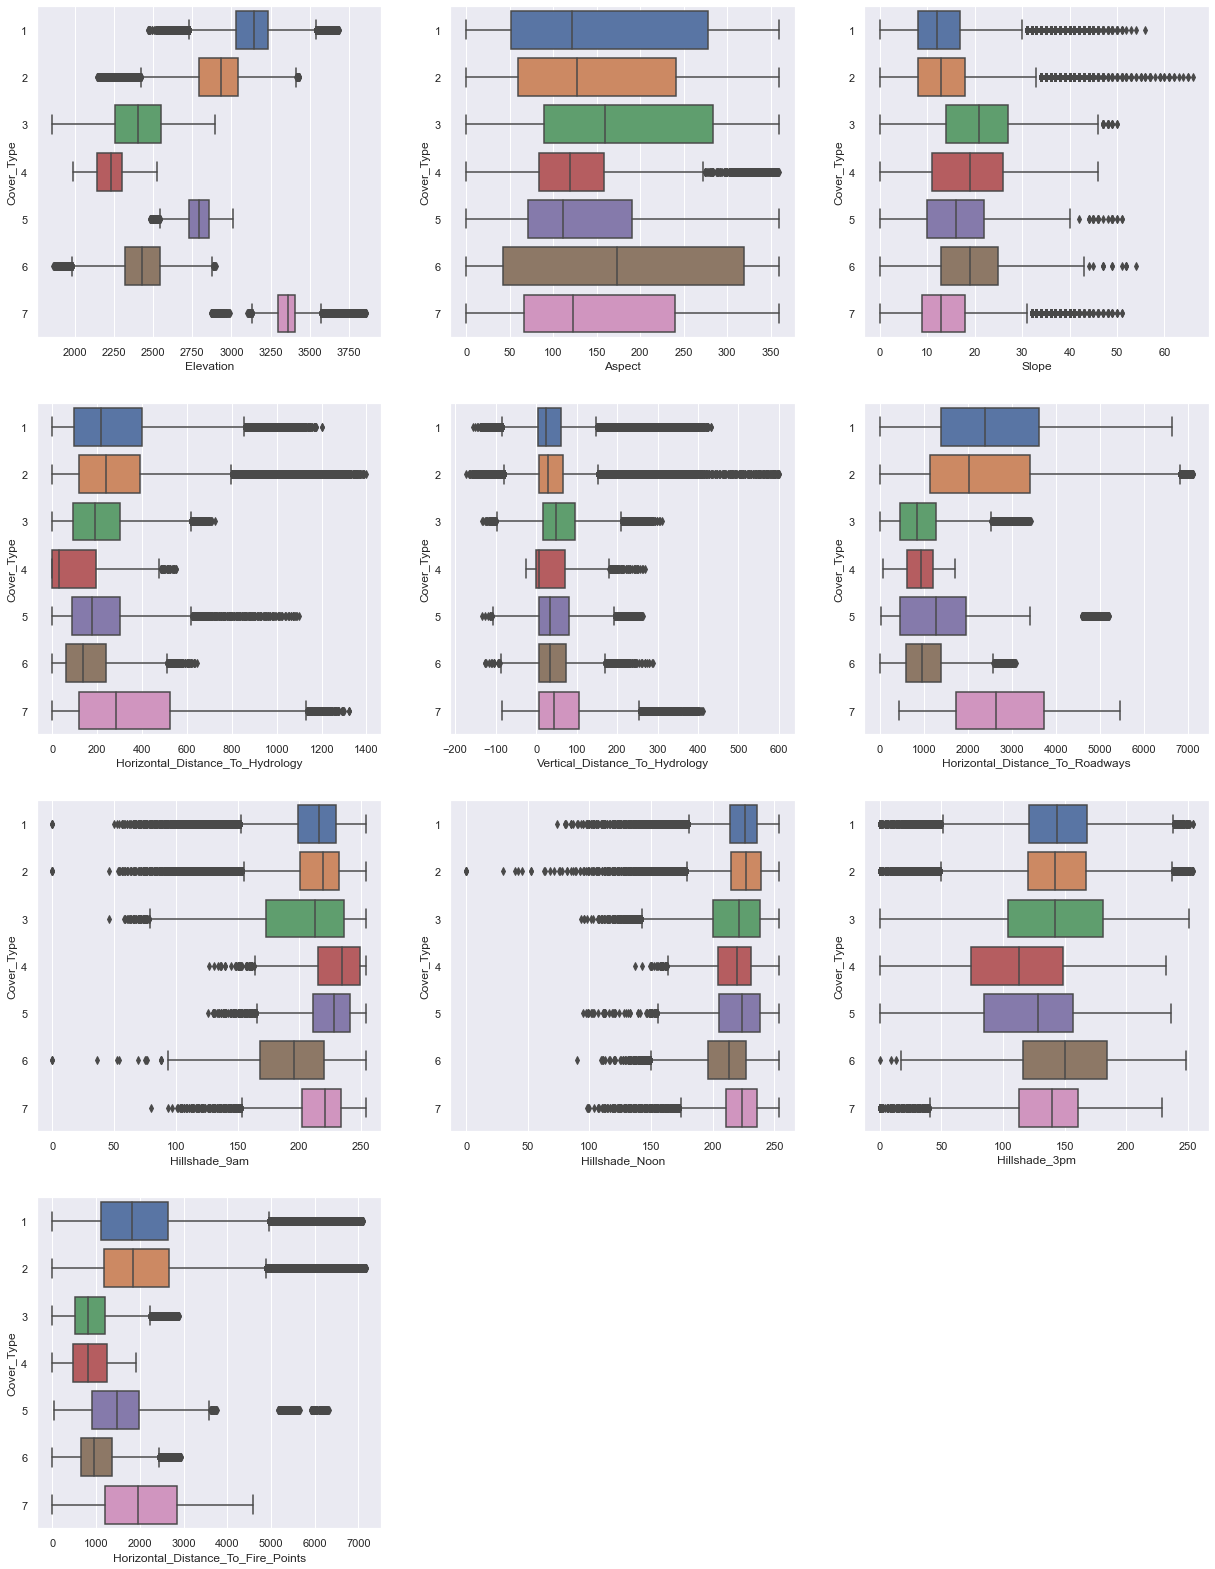

In [19]:
n = len(num_features)
if n <= 3:
    l = n
    m = 1
else:
    l = 3
    m = int(n / 3) if n % 3 == 0 else int(n // 3) + 1

fig = plt.figure(figsize=(7 * l, 7 * m))

for i in range(n):
    ax = fig.add_subplot(m, l, i + 1)
    sns.boxplot(y=cover_type.astype('category'), x=num_features[i], data=forest, ax=ax)
    #plt.show()

З усіх цих графіків ми можемо побачити, що ознака 'Elevation' дає найбільше інформації про різницю між класами набору даних. Але більшість ознак розподілені між класами схожим чином.

Утворимо збалансований набір даних, використовуючи техніку undersampling:

In [20]:
#min_samples = [4000, 4500, 3500, 2747, 3500, 4500, 3500]
min_samples = 2747                                             
full_forest = pd.concat([forest, cover_type], axis=1)
new_forest = pd.DataFrame()

for i in range(1, 8):
    temp = full_forest.loc[full_forest['Cover_Type'] == i].sample(n=min(min_samples, 
                                                                num_of_samples_per_class[i - 1]), random_state=0)

    new_forest = pd.concat([new_forest, temp])
    
X_b_balanced = new_forest.drop(['Cover_Type'], axis=1).to_numpy()
y_b_balanced = new_forest['Cover_Type'].to_numpy()

Будемо використовувати обидва набори даних, для того, щоб визначити, чи впливає незбалансованість на якість роботи логістичної регресії.

## 2. Splitting the data

In [21]:
from sklearn.model_selection import train_test_split

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.33, random_state=42)
X_train_b_bln, X_test_b_bln, y_train_b_bln, y_test_b_bln = train_test_split(X_b_balanced, y_b_balanced,
                                                                            test_size=0.33, random_state=42)

## 3. Building models

In [22]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty="none")
logit_l2 = LogisticRegression(penalty="l2")

mlogit = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, penalty="none", n_jobs=-1)
mlogit_l2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="l2", max_iter=500, n_jobs=-1)

mlogit_l2_bln = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="l2", max_iter=500)

In [23]:
logit.fit(X_train_a, y_train_a)
logit_l2.fit(X_train_a, y_train_a)

mlogit.fit(X_train_b, y_train_b)
mlogit_l2.fit(X_train_b, y_train_b)

mlogit_l2_bln.fit(X_train_b_bln, y_train_b_bln)

LogisticRegression(max_iter=500, multi_class='multinomial')

## 4. Models evaluation

In [24]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def scoring(y_true, y_pred, labels=None, average=[None], print_res=False):
    
    conf_mat = confusion_matrix(y_true, y_pred)
    con_mat = pd.DataFrame(conf_mat, index=labels, columns=labels)
    
    score = dict()
    for avg in average:
        score[avg] = {"Precision" : precision_score(y_true, y_pred, average=avg),
                    "Recall" : recall_score(y_true, y_pred, average=avg),
                    "F1-score" : f1_score(y_true, y_pred, average=avg)}
        
    if print_res:
        score_df = pd.DataFrame(score)
        plt.figure(figsize=(6,6))
        plt.title("Confusion matrix", fontsize=16)
        sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
        plt.ylabel("Actual", fontsize=14)
        plt.xlabel("Predicted", fontsize=14)
        
        display(score_df)

    return conf_mat, score

In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
def roc_pr(y_true, y_score, classes=[0, 1]):
    
    _, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    axes[0].set_title("PR curve")
    axes[0].set_xlabel("Recall")
    axes[0].set_ylabel("Precision")    

    axes[1].set_title("ROC curve")
    axes[1].set_xlabel("FP rate")
    axes[1].set_ylabel("TP rate")
    
    n_classes = len(classes)
    
    if n_classes == 2:
        
        y_score = y_score[:, 1]
        PrecisionRecallDisplay.from_predictions(y_true, y_score, ax=axes[0])

        fpr, tpr, thresholds = roc_curve(y_true, y_score)
        axes[1].plot(fpr, tpr)
        auc_score = roc_auc_score(y_true, y_score)
        print("AUC score: ", auc_score)
        return
        
    #Plotting PR curve    
    y_true_bin = label_binarize(y_true, classes=classes)    
        
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        #precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i],
                                                       # y_score[:, i])
        PrecisionRecallDisplay.from_predictions(y_true_bin[:, i], y_score[:, i], ax=axes[0])
        #axes[0].plot(recall[i], precision[i], label='class {}'.format(i))
        
    axes[0].legend(loc="best")
    
    #Plotting ROC curve
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    axes[1].plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    for i in range(n_classes):
        axes[1].plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))

    
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].legend(loc="lower right")
    
    
    macro_auc_score = roc_auc_score(y_true, y_score, multi_class="ovo",
                                  average="macro")
    print("Macro AUC score: ", macro_auc_score)

In [26]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(cls, X, y, title, scoring, cls_params={},cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):

    _, axes = plt.subplots(1, 1, figsize=(10, 10))

    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(cls().set_params(**cls_params), X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    #Plotting learning curve
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")


    return plt

In [27]:
def plot_decision_boundary(X, y, cls, step=0.1, cls_params={}, features_indx=[[0, 1]],
                           features_names=[["Feature-1", "Feature-2"]], max_points=-1):
    
    features_indx = np.array(features_indx)
    n = features_indx.shape[0]
    
    if n <= 3:
        l = n
        m = 1
    else:
        l = 3
        m = int(n / 3) if n % 3 == 0 else int(n // 3) + 1
        
    fig = plt.figure(figsize=(7 * l, 7 * m))
    
    for i in range(n):
        model = cls().set_params(**cls_params)
        
        model.fit(X[:, features_indx[i]], y)

        x_min, x_max = X[:, features_indx[i, 0]].min() - 1, X[:, features_indx[i, 0]].max() + 1
        y_min, y_max = X[:, features_indx[i, 1]].min() - 1, X[:, features_indx[i, 1]].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                             np.arange(y_min, y_max, step))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        ax = fig.add_subplot(m, l, i + 1)
        countour = ax.contourf(xx, yy, Z, alpha=0.4, cmap="Dark2")
        
        if max_points != -1:
            indxs = np.random.choice(X.shape[0], max_points, replace=False)
            scatter = ax.scatter(X[:, features_indx[i, 0]][indxs], X[:, features_indx[i, 1]][indxs], c=y[indxs], alpha=0.8, cmap="Dark2")
        else:
            scatter = ax.scatter(X[:, features_indx[i, 0]], X[:, features_indx[i, 1]], c=y, alpha=0.8, cmap="Dark2")
        
        handles, labels = countour.legend_elements()
        classes_names = np.unique(y)
        
        legend1 = ax.legend(handles, classes_names,
                            title="Areas", loc="best")
        
        ax.add_artist(legend1)
        
        #TODO добавить подписи фичей

## Logistic regression without regularization

In [28]:
y_pred_train_logit = logit.predict(X_train_a)
y_pred_test_logit = logit.predict(X_test_a)
y_score_logit = logit.predict_proba(X_test_a)

In [29]:
y_score_logit

array([[9.99949484e-01, 5.05161506e-05],
       [9.99935650e-01, 6.43504552e-05],
       [4.17895848e-01, 5.82104152e-01],
       [9.56116912e-01, 4.38830881e-02],
       [9.97053480e-01, 2.94652019e-03],
       [9.98423759e-01, 1.57624087e-03],
       [9.99919906e-01, 8.00937488e-05],
       [9.80441209e-01, 1.95587905e-02],
       [9.95922948e-01, 4.07705212e-03],
       [8.67490650e-01, 1.32509350e-01],
       [6.17478369e-01, 3.82521631e-01],
       [9.99849329e-01, 1.50670968e-04],
       [9.71490712e-01, 2.85092884e-02],
       [9.99976514e-01, 2.34864751e-05],
       [9.81589815e-01, 1.84101854e-02],
       [9.99984644e-01, 1.53564555e-05],
       [9.99860309e-01, 1.39691064e-04],
       [9.99865705e-01, 1.34294938e-04],
       [9.99952209e-01, 4.77908041e-05],
       [8.91744571e-01, 1.08255429e-01],
       [9.99951503e-01, 4.84966077e-05],
       [9.99882386e-01, 1.17613557e-04],
       [9.99938288e-01, 6.17120693e-05],
       [7.60388091e-01, 2.39611909e-01],
       [9.998567

binary
F1-score   0.621622
Precision  0.718750
Recall     0.547619

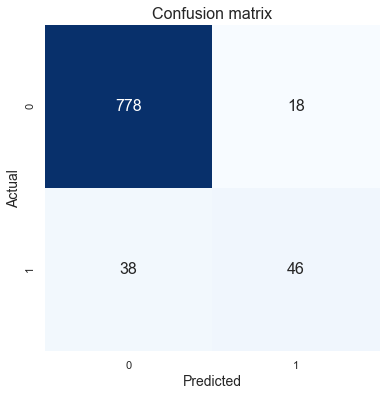

In [30]:
conf_m, score = scoring(y_train_a, y_pred_train_logit, average=['binary'], print_res=True)

binary
F1-score   0.705882
Precision  0.666667
Recall     0.750000

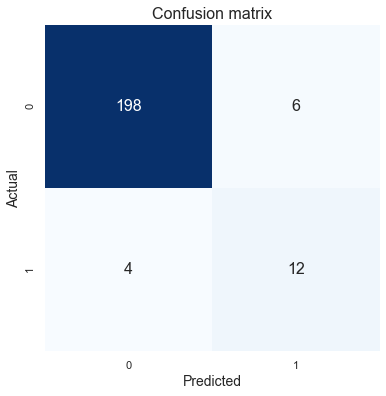

In [31]:
conf_m, score = scoring(y_test_a, y_pred_test_logit, average=['binary'], print_res=True)

Бачимо, що f1-score для навчального набору достатньо менший за f1-score для тренувального набору, тож, ця модель  "недонавчає".

AUC score:  0.9761029411764706


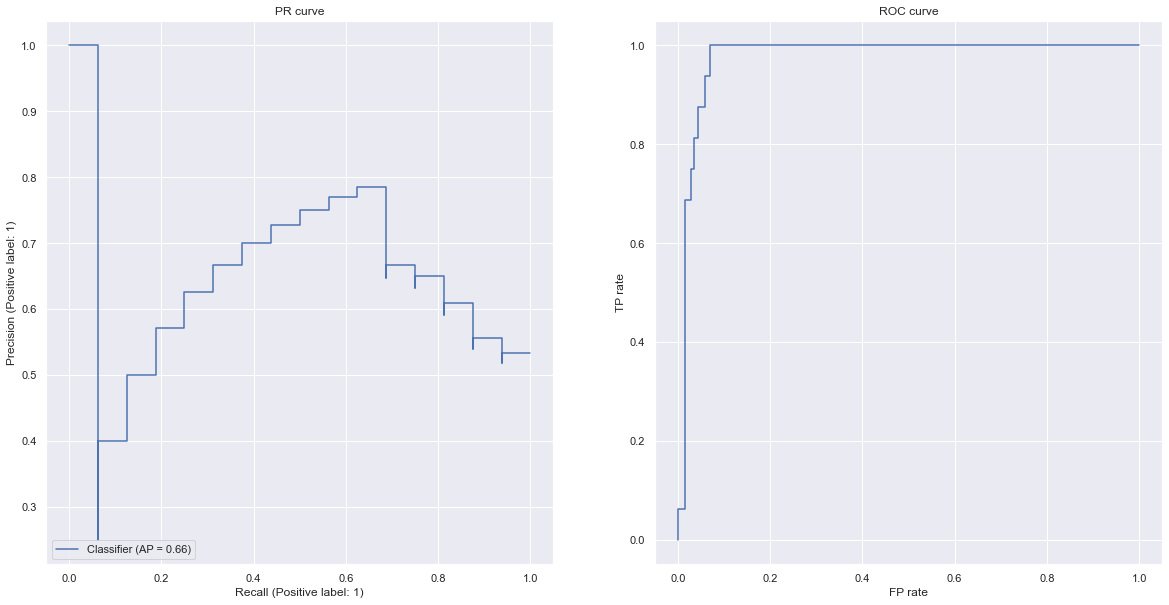

In [32]:
roc_pr(y_test_a, y_score_logit)

У той час, як ROC крива демонсрує, що алгоритм працює майже ідеально, з PR кривої можна зробити висновок, що модель є досить посередньою.

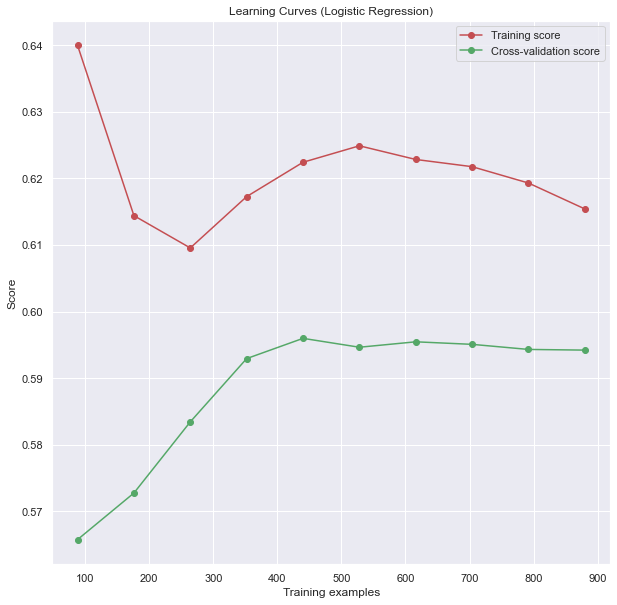

In [33]:
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Logistic Regression)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

_ = plot_learning_curve(LogisticRegression, X_a, y_a, title, 'f1', cls_params={'penalty' : 'none'},cv=cv, train_sizes=np.linspace(0.1, 1.0, 10))

Оптимальний розмір навчальної вибірки - 500 прикладів, зі збільшенням цього числа evaluation score майже не змінюється, а train score спадає.

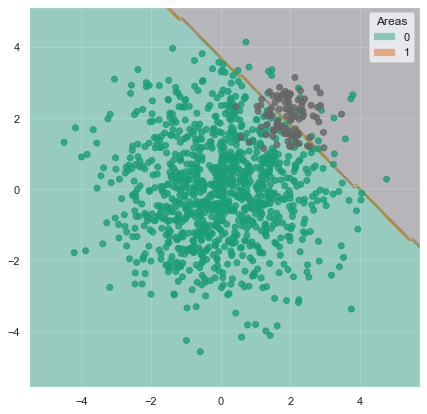

In [34]:
plot_decision_boundary(X_a, y_a, LogisticRegression, cls_params={'penalty' : 'none'})

## Logistic regression with L2 regularization

In [35]:
y_pred_train_logit_l2 = logit_l2.predict(X_train_a)
y_pred_test_logit_l2 = logit_l2.predict(X_test_a)
y_score_logit_l2 = logit_l2.predict_proba(X_test_a)

binary
F1-score   0.606897
Precision  0.721311
Recall     0.523810

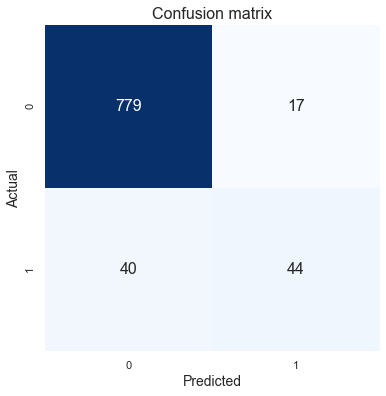

In [36]:
conf_m, score = scoring(y_train_a, y_pred_train_logit_l2, average=['binary'], print_res=True)

binary
F1-score   0.705882
Precision  0.666667
Recall     0.750000

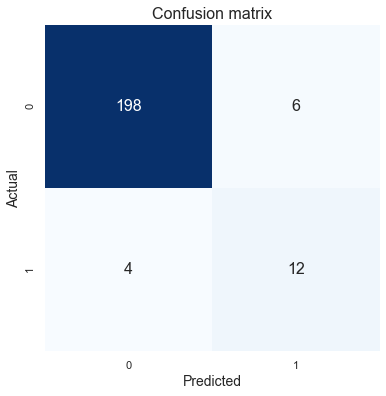

In [37]:
conf_m, score = scoring(y_test_a, y_pred_test_logit_l2, average=['binary'], print_res=True)

AUC score:  0.9761029411764706


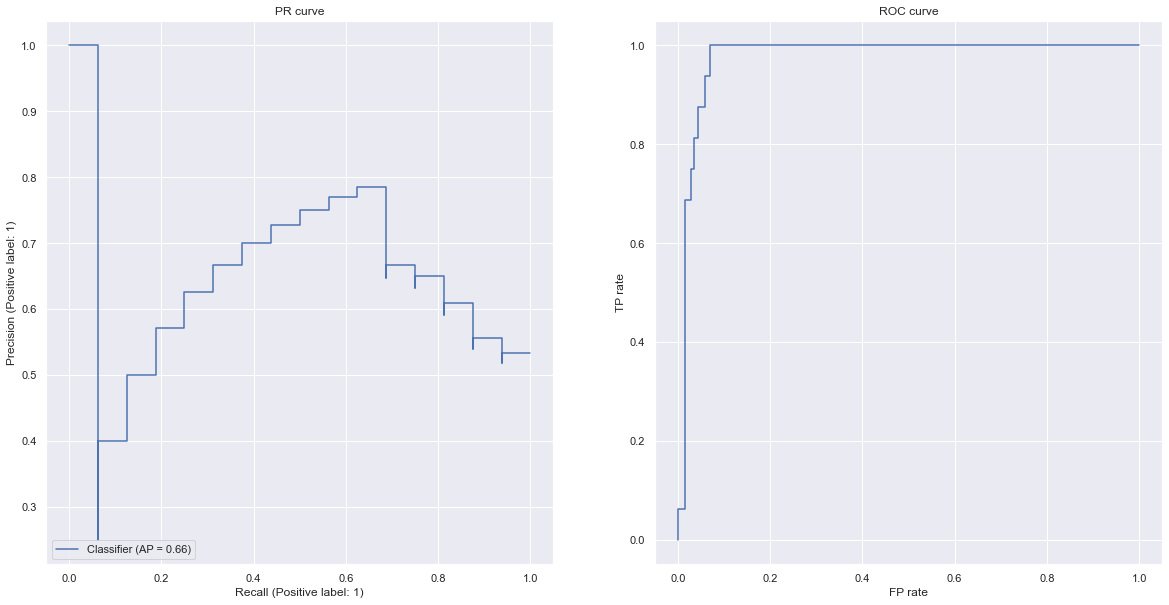

In [38]:
roc_pr(y_test_a, y_score_logit_l2)

Для логістичної регресії з регуляризацію результати вийшли майже такі ж самі, як і для моделі без регуляризації.

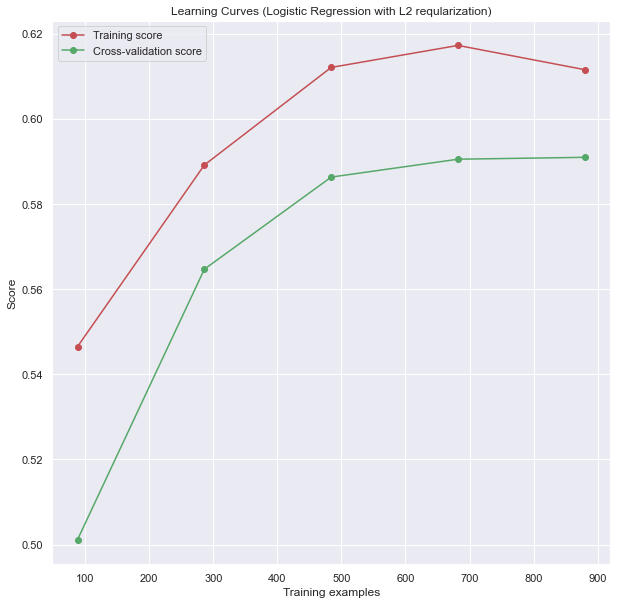

In [39]:
title = "Learning Curves (Logistic Regression with L2 reqularization)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

_ = plot_learning_curve(LogisticRegression, X_a, y_a, title, 'f1', cv=cv, cls_params={'penalty' : 'l2'})

Але в даному випадку навчальна крива демонструє, що чим більший розмір навчального набору, тим краще.

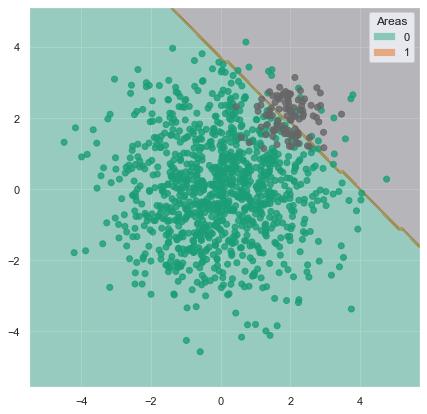

In [40]:
plot_decision_boundary(X_a, y_a, LogisticRegression, cls_params={'penalty' : 'l2'})

## Multinomial logistic regression without regularization

In [41]:
y_pred_train_mlogit = mlogit.predict(X_train_b)
y_pred_test_mlogit = mlogit.predict(X_test_b)
y_score_mlogit = mlogit.predict_proba(X_test_b)

/home/daria/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daria/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NaN  \
Precision    [0.6579511683870123, 0.6918036158318844, 0.5758009042779302, 0.0, 0.0, 0.14835164835164835, 0.19240745107286017]   
Recall     [0.672639607505886, 0.7799112647409078, 0.6193366032089118, 0.0, 0.0, 0.0023265833692373977, 0.058980845681243226]   
F1-score    [0.6652143148443137, 0.7332200551859429, 0.5967758085511164, 0.0, 0.0, 0.004581318401628914, 0.09028546138526222]   

              micro     macro  
Precision  0.665784  0.323759  
Recall     0.665784  0.304742  
F1-score   0.665784  0.298582

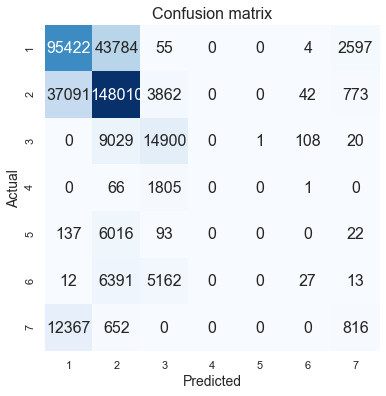

In [42]:
conf_m, score = scoring(y_train_b, y_pred_train_mlogit, average=[None, 'micro', 'macro'],
                        print_res=True, labels=[1, 2, 3, 4, 5, 6, 7])

/home/daria/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daria/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NaN  \
Precision   [0.6579300511616204, 0.6907679312079422, 0.5652483391331857, 0.0, 0.0, 0.20833333333333334, 0.17734225621414915]   
Recall     [0.6725971019463259, 0.7782042919923441, 0.6110636114911081, 0.0, 0.0, 0.003471017007983339, 0.05558052434456929]   
F1-score   [0.6651827355210718, 0.7318839122302448, 0.5872637633525062, 0.0, 0.0, 0.006828269033799931, 0.08463556518763544]   

              micro     macro  
Precision  0.664384  0.328517  
Recall     0.664384  0.302988  
F1-score   0.664384  0.296542

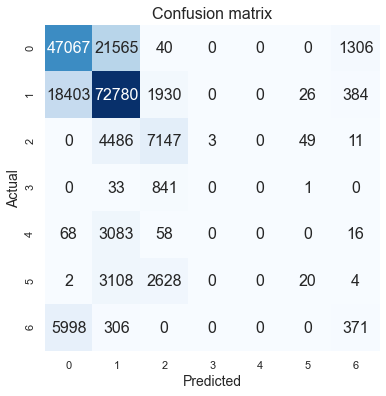

In [43]:
conf_m, score = scoring(y_test_b, y_pred_test_mlogit, average=[None, 'micro', 'macro'], print_res=True)

Міри якості для навчальної та тестової вибірок відрізняються несуттєво, отже перенавчання відсутнє. Для 4 та 5 классів набору данних жодний з прикладів не классифікувався правильно, що можна обгрунтувати тим, що доля цих класів у наборі даних найменша.

Macro AUC score:  0.8265714967156512


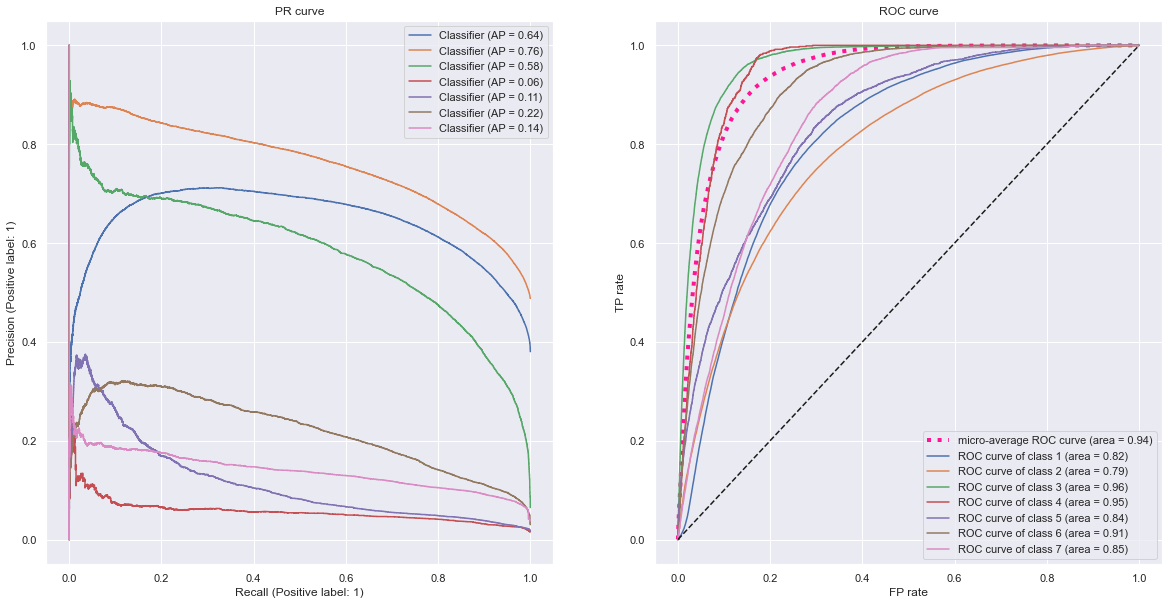

In [44]:
roc_pr(y_test_b, y_score_mlogit, classes=[1, 2, 3, 4, 5, 6, 7])

Як і у попередніх моделей, за ROC кривою алгоритм працює дуже гарно, за PR кривою - посередньо, а для 4, 5, 7 классів навіть занадто погано. 

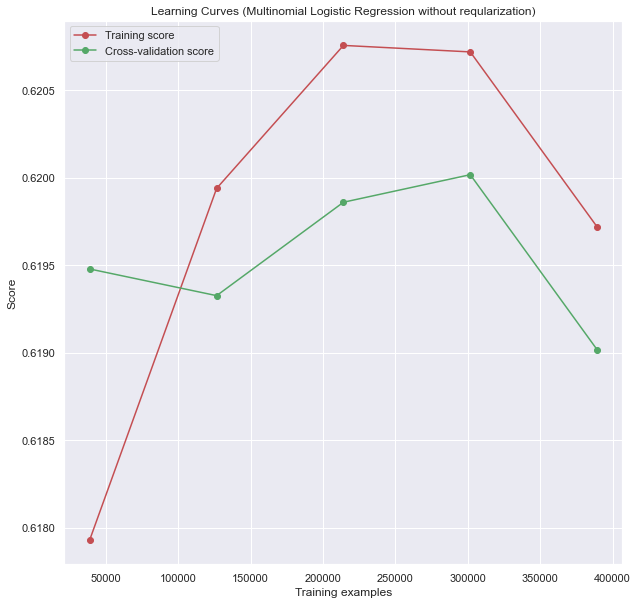

In [45]:
title = "Learning Curves (Multinomial Logistic Regression without reqularization)"

cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0)

_ = plot_learning_curve(LogisticRegression, X_b, y_b, title, 'f1_micro', cv=cv,
                        cls_params={'multi_class' : 'multinomial', 'penalty' : 'none', 'solver' : 'lbfgs'})

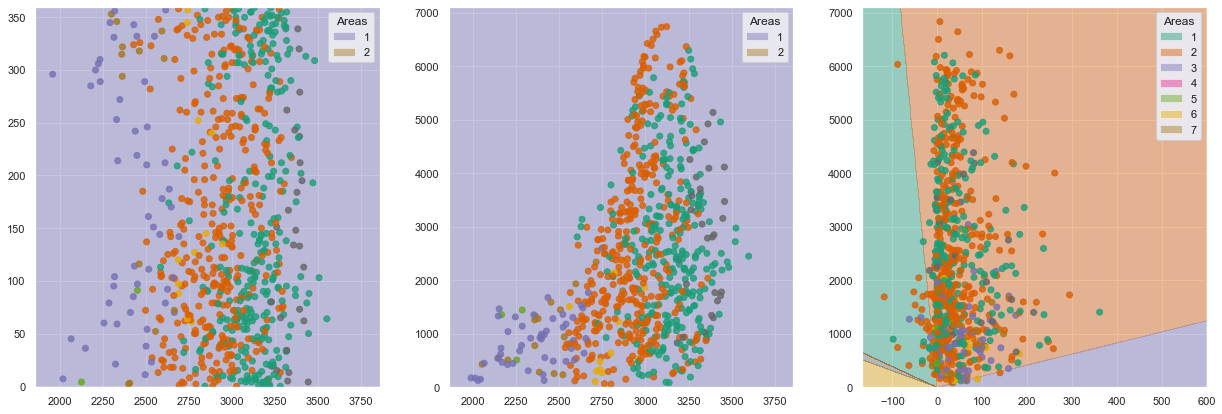

In [46]:
plot_decision_boundary(X_train_b, y_train_b, LogisticRegression, 
                       cls_params={'multi_class' : 'multinomial', 'penalty' : 'none', 'solver' : 'lbfgs'},
                      step=1, features_indx=[[0, 1], [0, 5], [4, 5]], max_points=750)

Через незбалансованість набору, визначені моделлю границі рішень не відповідають реальним даним.

## Multinomial regression with L2 regularization

In [47]:
y_pred_train_mlogit_l2 = mlogit_l2.predict(X_train_b)
y_pred_test_mlogit_l2 = mlogit_l2.predict(X_test_b)
y_score_mlogit_l2 = mlogit_l2.predict_proba(X_test_b)

/home/daria/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daria/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NaN  \
Precision   [0.6577714800259666, 0.6864714446307797, 0.5806477765616765, 0.0, 0.0, 0.17011494252873563, 0.19554519554519553]   
Recall     [0.6642582227798847, 0.785127886267112, 0.5953944633801646, 0.0, 0.0, 0.006376561826798794, 0.054571738344777736]   
F1-score    [0.6609989373007439, 0.7324926873632722, 0.5879286637798345, 0.0, 0.0, 0.01229235880398671, 0.08533001808318265]   

              micro     macro  
Precision  0.663757  0.327222  
Recall     0.663757  0.300818  
F1-score   0.663757  0.297006

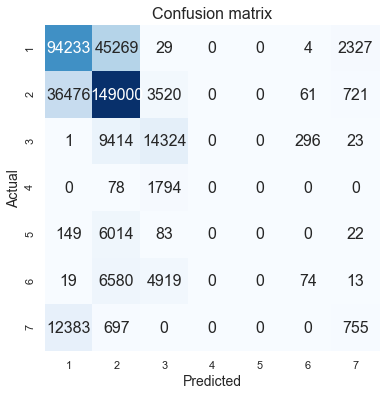

In [48]:
conf_m, score = scoring(y_train_b, y_pred_train_mlogit_l2, average=[None, 'micro', 'macro'],
                        print_res=True, labels=[1, 2, 3, 4, 5, 6, 7])

/home/daria/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daria/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NaN  \
Precision  [0.6577522721811525, 0.6855285313376988, 0.5713808649190182, 0.0, 0.0, 0.2037914691943128, 0.17860906217070602]   
Recall     [0.6649804224184743, 0.7835826481186446, 0.58515731874145, 0.0, 0.0, 0.007462686567164179, 0.05078651685393258]   
F1-score   [0.6613465979747735, 0.7312833357448996, 0.578187040635296, 0.0, 0.0, 0.014398124895362465, 0.0790855009914849]   

            micro     macro  
Precision  0.6626  0.328152  
Recall     0.6626  0.298853  
F1-score   0.6626  0.294900

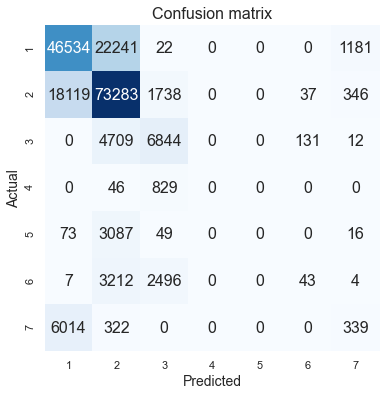

In [49]:
conf_m, score = scoring(y_test_b, y_pred_test_mlogit_l2, average=[None, 'micro', 'macro'],
                        print_res=True, labels=[1, 2, 3, 4, 5, 6, 7])

Доля правильно класифікованих прикладів 6 та 7 класів зросла, у порівнянні з моделлю без регуляризації.

Macro AUC score:  0.8272922667939715


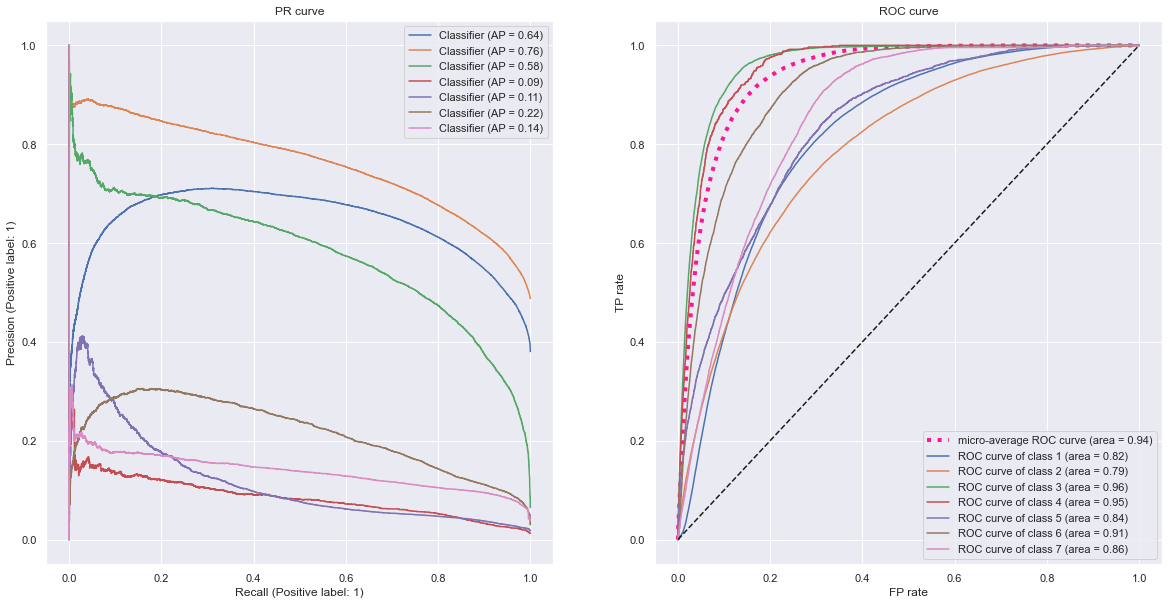

In [50]:
roc_pr(y_test_b, y_score_mlogit_l2, classes=[1, 2, 3, 4, 5, 6, 7])

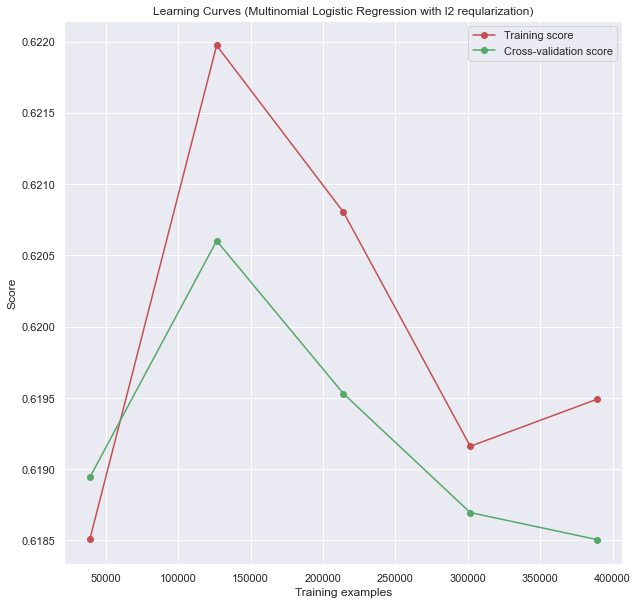

In [51]:
title = "Learning Curves (Multinomial Logistic Regression with l2 reqularization)"

cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=0)

_ = plot_learning_curve(LogisticRegression, X_b, y_b, title, 'f1_micro', cv=cv,
                       cls_params={'multi_class' : 'multinomial', 'penalty' : 'l2', 'solver' : 'lbfgs'})

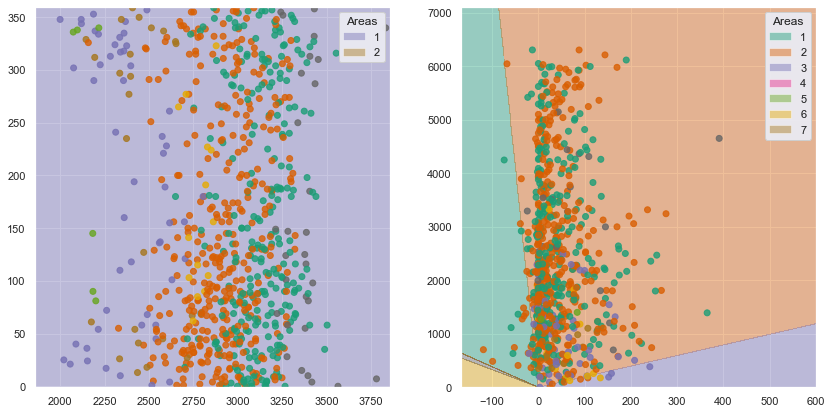

In [52]:
plot_decision_boundary(X_train_b, y_train_b, LogisticRegression, 
                       cls_params={'multi_class' : 'multinomial', 'penalty' : 'l2', 'solver' : 'lbfgs'},
                      step=1, features_indx=[[0, 1], [4, 5]], max_points=750)

## Multinomial regression with L2 regularization (balanced dataset)

In [53]:
y_pred_train_mlogit_l2_bln = mlogit_l2_bln.predict(X_train_b_bln)
y_pred_test_mlogit_l2_bln = mlogit_l2_bln.predict(X_test_b_bln)
y_score_mlogit_l2_bln = mlogit_l2_bln.predict_proba(X_test_b_bln)

NaN  \
Precision  [0.49673202614379086, 0.4453257790368272, 0.5013831258644537, 0.722249151720795, 0.5505995203836931, 0.4736543909348442, 0.6984585741811176]   
Recall       [0.4504310344827586, 0.42235357334766255, 0.3998896856039713, 0.8023694130317717, 0.623574144486692, 0.4649610678531702, 0.78082929456112]   
F1-score   [0.4724498445888669, 0.4335355763927192, 0.44492175513961335, 0.7602040816326531, 0.5848191543555782, 0.4692674712321077, 0.737350622934147]   

              micro     macro  
Precision  0.564387  0.555486  
Recall     0.564387  0.563487  
F1-score   0.564387  0.557507

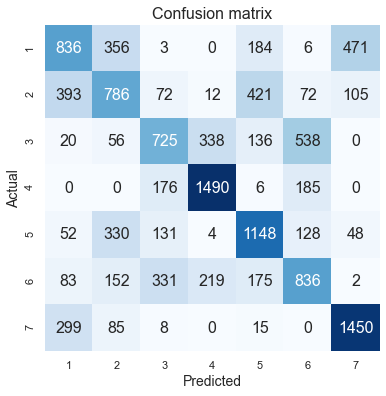

In [54]:
conf_m, score = scoring(y_train_b_bln, y_pred_train_mlogit_l2_bln, average=[None, 'micro', 'macro'],
                        print_res=True, labels=[1, 2, 3, 4, 5, 6, 7])

NaN  \
Precision    [0.4975609756097561, 0.4261501210653753, 0.5387931034482759, 0.7063414634146341, 0.5476419634263715, 0.4878048780487805, 0.7352056168505516]   
Recall     [0.45791245791245794, 0.3972911963882618, 0.4014989293361884, 0.8134831460674158, 0.6280353200883002, 0.48472075869336145, 0.8235955056179776]   
F1-score     [0.4769140853302163, 0.411214953271028, 0.4601226993865031, 0.7561357702349869, 0.5850899742930592, 0.48625792811839325, 0.7768945416004239]   

              micro     macro  
Precision  0.570596  0.562785  
Recall     0.570596  0.572362  
F1-score   0.570596  0.564661

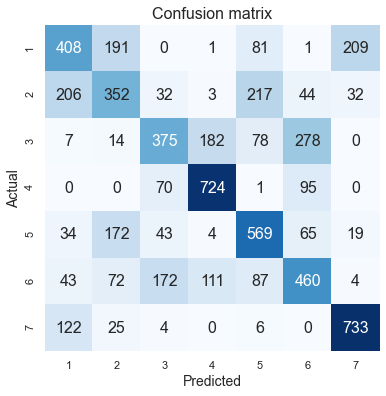

In [55]:
conf_m, score = scoring(y_test_b_bln, y_pred_test_mlogit_l2_bln, average=[None, 'micro', 'macro'],
                        print_res=True, labels=[1, 2, 3, 4, 5, 6, 7])

Хоча загально по всім класам метрики погіршились (f1-micro), але на кожному з класів в середньому - покращились (f1-macro).

Macro AUC score:  0.8971612943230015


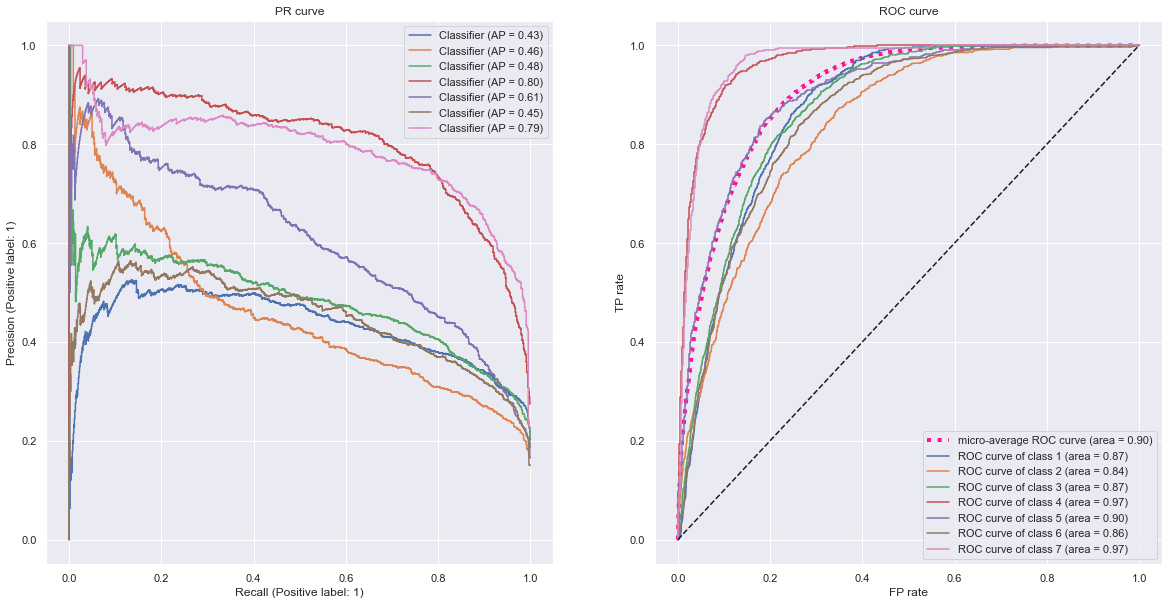

In [56]:
roc_pr(y_test_b_bln, y_score_mlogit_l2_bln, classes=[1, 2, 3, 4, 5, 6, 7])

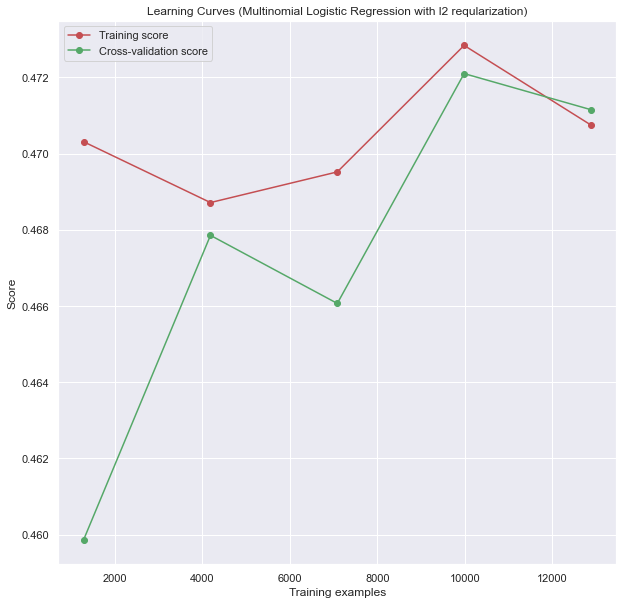

In [58]:
title = "Learning Curves (Multinomial Logistic Regression with l2 reqularization)"

cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=0)

_ = plot_learning_curve(LogisticRegression, X_b_balanced, y_b_balanced, title, 'f1_macro', 
                        cv=cv, cls_params={'multi_class' : 'multinomial', 'penalty' : 'l2', 'solver' : 'lbfgs'})

З мір якості та навчальної кривої можем зробити висновок, що перенавчання відсутнє.

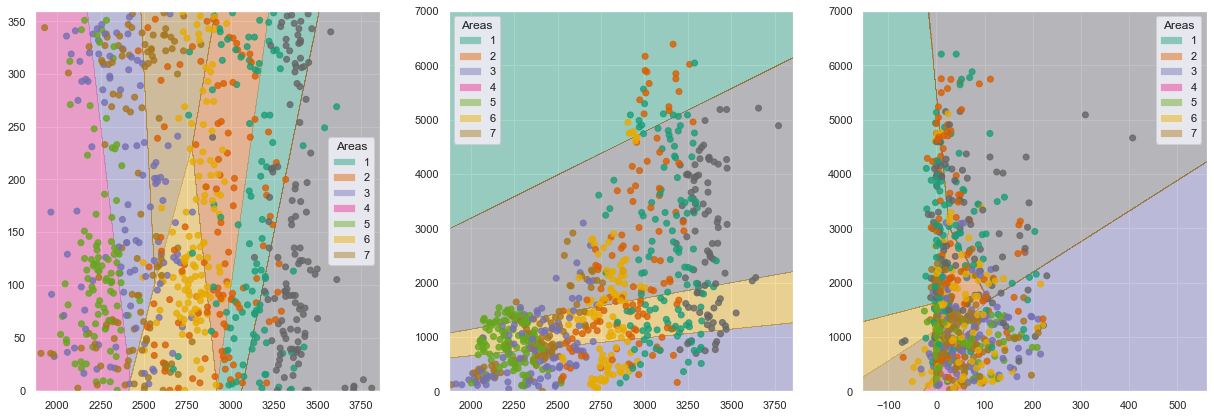

In [60]:
plot_decision_boundary(X_b_balanced, y_b_balanced, LogisticRegression, 
                       cls_params={'multi_class' : 'multinomial', 'penalty' : 'l2', 'solver' : 'lbfgs'},
                      step=1, features_indx=[[0, 1], [0, 5], [4, 5]], max_points=750)

## Can we do better?

## 5. Model tunning

In [89]:
from sklearn.model_selection import GridSearchCV
grid_1 = [{'penalty' : ['l2', 'none'],
                'C' :  [100, 10, 1.0, 0.1, 0.01], 
                'solver' : ['newton-cg', 'lbfgs', 'sag'],
                'class_weight' : ['balanced', None]}]
grid_2 = [{'penalty' : ['none', 'l2'],
                'max_iter' : [1000, 1500],
                'C' :  [100, 10, 1.0, 0.1, 0.01],
                'solver' : ['lbfgs']}]

In [81]:
logit_clf = GridSearchCV(LogisticRegression(), param_grid=grid_1, cv=5,
                          verbose=True, n_jobs=-1)

logit_clf.fit(X_train_a, y_train_a)
print(f"Best score: {logit_clf.best_score_} with {logit_clf.best_params_}")
best_logit_clf = logit_clf.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best score: 0.9352272727272727 with {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}


In [82]:
y_pred_gs = best_logit_clf.predict(X_test_a)

binary
F1-score   0.705882
Precision  0.666667
Recall     0.750000

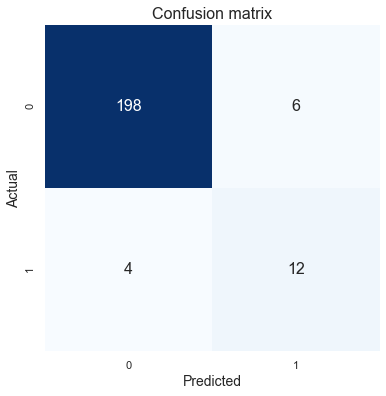

In [83]:
conf_m, score = scoring(y_test_a, y_pred_gs, average=['binary'], print_res=True)

In [90]:
mlogit_clf = GridSearchCV(LogisticRegression(), param_grid=grid_2, cv=5,
                          scoring='f1_macro', verbose=True, n_jobs=-1)

mlogit_clf.fit(X_train_b_bln, y_train_b_bln)
best_mlogit_clf = mlogit_clf.best_estimator_
print(f"Best score: {mlogit_clf.best_score_} with {mlogit_clf.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: 0.6143729438570522 with {'C': 1.0, 'max_iter': 1500, 'penalty': 'l2', 'solver': 'lbfgs'}


In [85]:
y_pred_gs_2 = best_mlogit_clf.predict(X_test_b_bln)

NaN  \
Precision     [0.6012422360248447, 0.450653983353151, 0.5788690476190477, 0.7044776119402985, 0.6071065989847716, 0.544243577545195, 0.8074974670719351]   
Recall      [0.5432098765432098, 0.42776523702031605, 0.4164882226980728, 0.7955056179775281, 0.6600441501103753, 0.6027397260273972, 0.895505617977528]   
F1-score   [0.570754716981132, 0.43891140706427323, 0.48443337484433374, 0.7472295514511874, 0.6324695928080382, 0.5720000000000001, 0.8492274906766115]   

              micro     macro  
Precision  0.618815  0.613442  
Recall     0.618815  0.620180  
F1-score   0.618815  0.613575

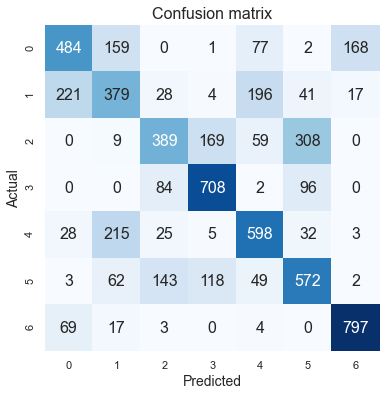

In [86]:
conf_m, score = scoring(y_test_b_bln, y_pred_gs_2, average=[None, 'micro', 'macro'], print_res=True)

# ВИСНОВОК:

1. Для першого набору даних найкращою виявилася модель логістичної регресії з Л2 регуляризацію (коефіцієнт регуляризіції C = 100) параметром class_weight=None (тобто обидва класи мають вагу 1) та алгоритмом оптимізації newton-cg (поєднання методів спряжених градієнтів та Ньютона)

2. Для другого (збалансованого варіанту) набору даних найкращою є модель поліноміальної регресії без використання регуляризації з параметром max_iter=1000.

Обидва набори даних були далекі від лінійного розділення, тому такий алгоритм, як логістична регресія виявився неспроможним якісно їх класифікувати. Можливо, якщо для другого випадку застосувати більш потужні методи балансування (наприклад алгоритм SMOTETomek з бібліотеки imbalancedlearn, який поєднує техніки under- i over- sampling) ситуація покращиться, але все ж для гарного прогнозу потрібно обрати іншу модель.

NaN  \
Precision  [0.6327237507387222, 0.7482043446955727, 0.560192023633678, 0.17495581923756628, 0.0834301059660328, 0.29777662427545637, 0.25781697905181916]   
Recall                  [0.5507873903226729, 0.45555638719887087, 0.38910738714090287, 0.792, 0.7128682170542636, 0.5973620270739327, 0.8758052434456929]   
F1-score   [0.5889192781945697, 0.5663073385349514, 0.45923309788092836, 0.2866004962779156, 0.14937786296741495, 0.3974366376075285, 0.3983645655877342]   

              micro     macro  
Precision  0.511015  0.393586  
Recall     0.511015  0.624784  
F1-score   0.511015  0.406606

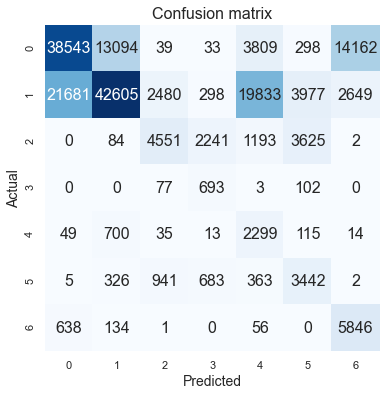

In [91]:
y_pred_gs_3 = best_mlogit_clf.predict(X_test_b)
conf_m, score = scoring(y_test_b, y_pred_gs_3, average=[None, 'micro', 'macro'], print_res=True)